## **Ejercicio 1: Clasificación con K-Nearest Neighbors (KNN)**

### Enunciado del Ejercicio:

Supongamos que tenemos los siguientes datos:

| Fruta       | Peso (g) | Dulzura (1-10) | Clase       |
|-------------|----------|----------------|-------------|
| Manzana     | 148      | 5              | Clase 1     |
| Perón     | 160      | 6              | Clase 1     |
| Plátano macho     | 120      | 8              | Clase 2     |
| Plátano dominico| 130      | 9              | Clase 2     |
| Naranja     | 180      | 4              | Clase 3     |
| Mandarina    | 170      | 5              | Clase 3     |

Supongamos que queremos clasificar:

- **Nueva fruta**: Peso = 140 g, Dulzura = 7

Usa el algoritmo KNN para clasificar la nueva fruta con diferentes valores de $ K $: $ K=1 $, $ K=3 $ y $ K=5 $.

### Solución:

1. **Calculamos las distancias**:

   - Distancia a Manzana (150, 5):
     $$
     \sqrt{(140 - 148)^2 + (7 - 5)^2} = \sqrt{(-8)^2 + (2)^2} = \sqrt{64+4} = \sqrt{68} \approx 8.24
     $$

   - Distancia a Perón (160, 6):
     $$
     \sqrt{(140 - 160)^2 + (7 - 6)^2} = \sqrt{(-20)^2 + (1)^2} = \sqrt{400 + 1} = \sqrt{401} \approx 20.02
     $$

   - Distancia a Plátano macho (120, 8):
     $$
     \sqrt{(140 - 120)^2 + (7 - 8)^2} = \sqrt{(20)^2 + (-1)^2} = \sqrt{400 + 1} = \sqrt{401} \approx 20.02
     $$

   - Distancia a Plátano dominico (130, 9):
     $$
     \sqrt{(140 - 130)^2 + (7 - 9)^2} = \sqrt{(10)^2 + (-2)^2} = \sqrt{100 + 4} = \sqrt{104} \approx 10.20
     $$

   - Distancia a Naranja (180, 4):
     $$
     \sqrt{(140 - 180)^2 + (7 - 4)^2} = \sqrt{(-40)^2 + (3)^2} = \sqrt{1600 + 9} = \sqrt{1609} \approx 40.12
     $$

   - Distancia a Mandarina (170, 5):
     $$
     \sqrt{(140 - 170)^2 + (7 - 5)^2} = \sqrt{(-30)^2 + (2)^2} = \sqrt{900 + 4} = \sqrt{904} \approx 30.05
     $$

   | Fruta      | Distancia |
   |------------|-----------|
   | Manzana    | 8.24    |
   | Perón    | 20.02     |
   | Plátano macho    | 20.02     |
   | Plátano   dominico | 10.20     |
   | Naranja    | 40.12     |
   | Mandarina    | 30.05     |

2. **Clasificación con diferentes valores de $ K $**:

   - **Para $ K=1 $**:
     - El vecino más cercano es **Manzana (148, 5)** con una distancia de **8.24**.
     - **Clasificación**: **Clase 1**

   - **Para $ K=3 $**:
     - Los 3 vecinos más cercanos son:
       - Manzana (148, 5) - Clase 1 (10.20)
       - Plátano macho (130, 9) - Clase 2 (10.20)
       - Plátano dominico (120, 8) - Clase 2 (20.02)
     - **Clasificación**:
       - Clase 1 (1 voto)
       - Clase 2 (2 votos)
       - **Resultado**: **Clase 2**

   - **Para $ K=5 $**:
     - Los 5 vecinos más cercanos son:
       - Manzana (148, 5) - Clase 1 (8.28)
       - Plátano macho (130, 9) - Clase 2 (10.20)
       - Plátano dominico (120, 8) - Clase 2 (20.02)
       - Perón (160, 6) - Clase 1 (20.02)
       - Mandarina (170, 5) - Clase 3 (30.05)
     - **Clasificación**:
       - Clase 1 (2 votos)
       - Clase 2 (2 votos)
       - Clase 3 (1 voto)
       - **Resultado**: **Clase 1**

### Conclusión:
En este ejemplo, para $ K=1 $, la nueva fruta se clasifica como **Clase 1**. Sin embargo, al aumentar $ K $ a $ 3 $ y $ 5 $, la clasificación cambia a **Clase 2** y **Clase 3** respectivamente, mostrando cómo la elección de $ K $ puede afectar la clasificación final en el algoritmo KNN.


## Ejercicio 2:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargar la base de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Solo tomamos las dos primeras características para graficar
y = iris.target

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
# Crear el clasificador KNN con todos los parámetros
k = 3
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', 
                           leaf_size=30, metric='minkowski', p=2)

# Entrenar el clasificador
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=17)

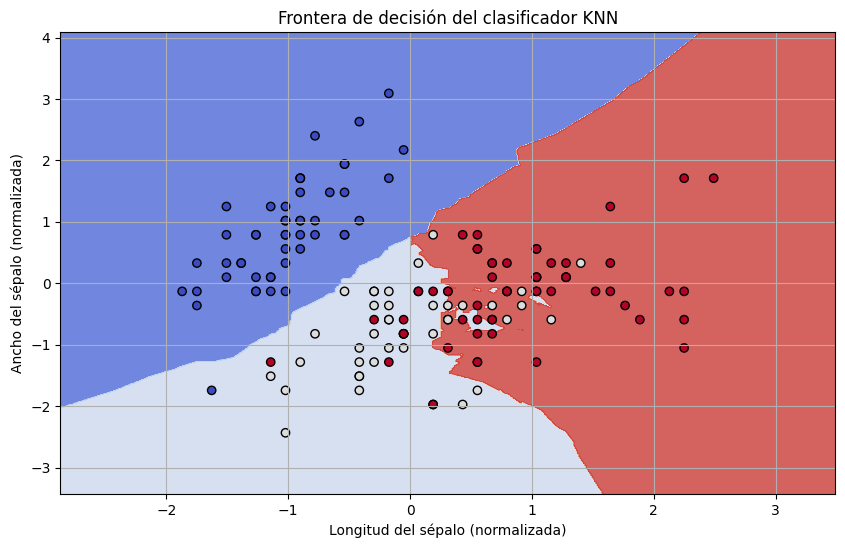

In [77]:
# Crear una malla para graficar la frontera de decisión
h = 0.01  # Paso en la malla
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predecir las clases en cada punto de la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Frontera de decisión del clasificador KNN')
plt.xlabel('Longitud del sépalo (normalizada)')
plt.ylabel('Ancho del sépalo (normalizada)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()
plt.show()

In [69]:
# Clasificar una nueva flor
new_flower = np.array([[5.0, 3.5]])  # Solo las dos primeras características
new_flower_scaled = scaler.transform(new_flower)
predicted_class = knn.predict(new_flower_scaled)

# Mostrar el resultado
predicted_species = iris.target_names[predicted_class][0]
print(f'La nueva flor se clasifica como: {predicted_species}')

La nueva flor se clasifica como: setosa


## Ejercicio 3: K óptimo

El valor óptimo de K según validación cruzada es: 17


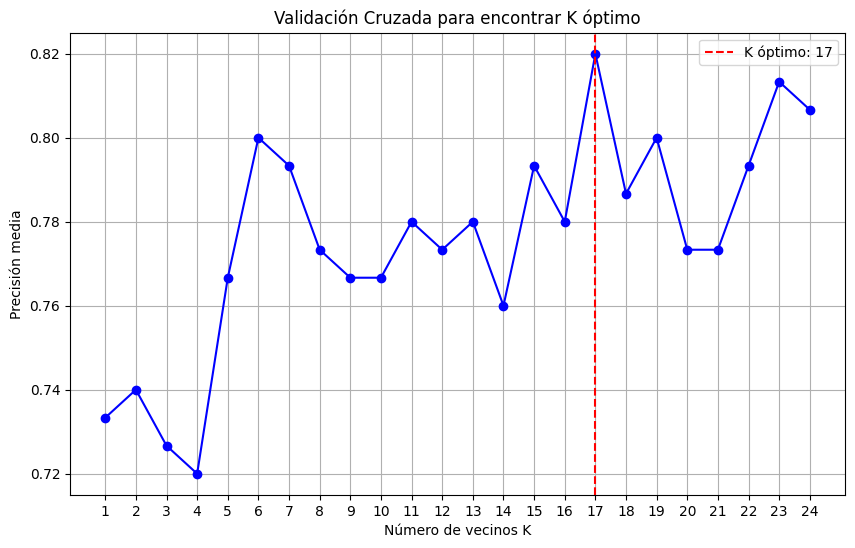

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Cargar la base de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Usar solo las dos primeras características
y = iris.target

# Arrays
k_values = range(1, 25)

# Validación Cruzada para determinar el K óptimo
mean_scores_cv = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation
    mean_scores_cv.append(scores.mean())

# Encontrar el K óptimo de Validación Cruzada
optimal_k_cv = k_values[np.argmax(mean_scores_cv)]
print(f'El valor óptimo de K según validación cruzada es: {optimal_k_cv}')

# Graficar la Validación Cruzada
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores_cv, marker='o', color='blue')
plt.axvline(optimal_k_cv, color='red', linestyle='--', label=f'K óptimo: {optimal_k_cv}')
plt.title('Validación Cruzada para encontrar K óptimo')
plt.xlabel('Número de vecinos K')
plt.ylabel('Precisión media')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


## Ejercicio 4: distintos tiempos

 La base de datos Iris . contiene información sobre tres especies diferentes de flores: Iris setosa, Iris versicolor e Iris virginica.

Para cada especie, se han medido cuatro características distintas: longitud del sépalo,  ancho del sépalo, longitud del pétalo y  ancho del pétalo, todas expresadas en cm.

In [ ]:
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [126]:
# Cargar la base de datos Iris
iris = load_iris()
X = iris.data  # Todas las características
y = iris.target

# Definir los valores de K
k = 3

In [127]:
# Definir un nuevo dato para clasificar
new_flower2= np.array([[5.1, 3.5, 1.4, 0.2]])

In [142]:
%%time
# Clasificación usando KD Tree
knn_kd = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
start_time_kd = time.time()
knn_kd.fit(X, y)  # Usar todos los datos para entrenamiento
predicted_class_kd = knn_kd.predict(new_flower2)  # Hacer predicciones
time_kd = time.time() - start_time_kd

CPU times: user 6.09 ms, sys: 859 μs, total: 6.95 ms
Wall time: 6.02 ms


In [141]:
%%time
# Clasificación usando Ball Tree
knn_ball = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
start_time_ball = time.time()
knn_ball.fit(X, y)  # Usar todos los datos para entrenamiento
predicted_class_ball = knn_ball.predict(new_flower2)  # Hacer predicciones
time_ball = time.time() - start_time_ball

CPU times: user 5.21 ms, sys: 951 μs, total: 6.16 ms
Wall time: 5.18 ms


In [140]:
%%time
# Clasificación usando Brute Force
knn_brute = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
start_time_brute = time.time()
knn_brute.fit(X, y)  # Usar todos los datos para entrenamiento
predicted_class_brute = knn_brute.predict(new_flower2)  # Hacer predicciones
time_brute = time.time() - start_time_brute

CPU times: user 16.5 ms, sys: 543 μs, total: 17 ms
Wall time: 3.38 ms


In [139]:
# Imprimir los tiempos
print(f'Tiempo de clasificación con KD Tree: {time_kd:.6f} segundos')
print(f'Tiempo de clasificación con Ball Tree: {time_ball:.6f} segundos')
print(f'Tiempo de clasificación con Brute Force: {time_brute:.6f} segundos')

# Mostrar el resultado
predicted_species = iris.target_names[predicted_class_ball][0]
print(f'La nueva flor se clasifica como: {predicted_species}')

Tiempo de clasificación con KD Tree: 0.005636 segundos
Tiempo de clasificación con Ball Tree: 0.003579 segundos
Tiempo de clasificación con Brute Force: 0.004419 segundos
La nueva flor se clasifica como: setosa


### 

La base de datos Wine de sklearn contiene 13 características que describen diferentes propiedades químicas de los vinos. Estas características incluyen medidas como el contenido de alcohol, ácido málico, cenizas, y la alcalinidad de las cenizas, entre otras. También se incluyen parámetros como el magnesio, los fenoles totales, los flavonoides y otros compuestos fenólicos.

In [88]:
import numpy as np
import time
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# Cargar la base de datos Wine
wine = load_wine()
X = wine.data  # Todas las características
y = wine.target

# Definir los valores de K
k = 3

In [115]:
# Definir un nuevo dato para clasificar
new_data = np.array([[12.8, 0.5, 2.1, 20.0, 90.0, 1.7, 0.5, 1.0, 0.5, 1.0, 1.0, 2.7, 0.5]])

In [118]:
# Clasificación usando KD Tree
knn_kd = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
start_time_kd = time.time()
knn_kd.fit(X, y)  # Usar todos los datos para entrenamiento
knn_kd.predict(new_data)  # Hacer predicciones
time_kd = time.time() - start_time_kd

In [119]:
# Clasificación usando Ball Tree
knn_ball = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
start_time_ball = time.time()
knn_ball.fit(X, y)  # Usar todos los datos para entrenamiento
knn_ball.predict(new_data)  # Hacer predicciones
time_ball = time.time() - start_time_ball

In [120]:
# Clasificación usando Brute Force
knn_brute = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
start_time_brute = time.time()
knn_brute.fit(X, y)  # Usar todos los datos para entrenamiento
knn_brute.predict(new_data)  # Hacer predicciones
time_brute = time.time() - start_time_brute

In [121]:
# Imprimir los tiempos
print(f'Tiempo de clasificación con KD Tree: {time_kd:.6f} segundos')
print(f'Tiempo de clasificación con Ball Tree: {time_ball:.6f} segundos')
print(f'Tiempo de clasificación con Brute Force: {time_brute:.6f} segundos')

Tiempo de clasificación con KD Tree: 0.007626 segundos
Tiempo de clasificación con Ball Tree: 0.006271 segundos
Tiempo de clasificación con Brute Force: 0.003433 segundos
